## This tutorial on PyTorch is gathered and edited by Ardavan Modarres; Initial coding: 2024-08-25.

# Table of Contents:
* [Introductory Stuff](#first-bullet)
** [Defining tensors](#first-bullet)
** [Some information about the tensors](#first-bullet)
** [Getting the device that tensors are defined on](#first-bullet)
** [Defining zero, one, empty, and identity matrices](#first-bullet)
** [Generate random tensors](#first-bullet)
** [Some basic operations+defining new tensors like another one](#first-bullet)
** [Loading and saving tensors](#first-bullet)
** [Some PyTorch functions](#first-bullet)
* [Defining and training NNs](#second-bullet)
** [Defining models (a CNN for instance) using nn.Sequential](#first-bullet)
** [Training a dense and a convolutional neural network for classification of Fashion MNIST dataset](#first-bullet)
** [1: Training a Fully Connected Neural Network](#third-bullet)
** [Defining hyperparameters and loading the dataset](#first-bullet)
** [Defining the fully connected network](#first-bullet)
** [Defining the train and test functions](#first-bullet)
** [Defining the criterion, optimizer, and doing the train and test steps](#first-bullet)
** [2: Training a convolutional neural network](#first-bullet)
** [Defining hyperparameters](#first-bullet)
** [Defining a class for the convolutional neural network](#first-bullet)
** [Defining the criterion, optimizer, instanciating an object from CNN class, and doing the train and test steps](#first-bullet)

# Introductory Stuff

In [38]:
# Imports
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sn
from collections import OrderedDict
import math
from tqdm import tqdm

In [39]:
print(torch.__version__) # print current torch version installed

2.3.1+cu121


## Defining tensors

In [40]:
v = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(type(v))
t1 = torch.tensor(v)  # Defining a torch tensor from an input list
t2 = torch.tensor(np.array(v))  # Defining a torch tensor from an input numpy array
t2prime = torch.from_numpy(np.array(v))
t22numpy = t2.numpy()  # tensor to numpy array
print("t1:\n", t1)
print("t2\n", t2)
print("t2prime\n", t2prime)
print(t1==t2)

<class 'list'>
t1:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
t2
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
t2prime
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


## Some information about the tensors

In [41]:
print("t1.shape = ", t1.shape)
print("t1.size = ", t1.size())
print("t1 num elements = ", t1.numel())
print("Sum of elements of t1: ", t1.sum().item())
print("t1 min: ", t1.min(), "t1 max: ", t1.max())
print("t1 min: ", t1.min().item(), "t1 max: ", t1.max().item())
print("t1 type: ", type(t1), t1.dtype)
print("t1 DType: ", t1.float().dtype)
print("t1 mean: ", t1.float().mean().item(), "t1 std: ", t1.float().std().item())
print("Transposed tensor:\n", t1.t())
print("Sliced tensor:\n", t1.t()[:, 0])
print("Reshaped tensor:\n", t1.view(9, 1))
print("Reshaped tensor:\n", t1.view(1, -1))
print("Repeated tensor:\n", t1.repeat(2, 2))
print(t1.dtype, t1.type(torch.float16).dtype) # change tensor type: tensor.type(torch.type)

t1.shape =  torch.Size([3, 3])
t1.size =  torch.Size([3, 3])
t1 num elements =  9
Sum of elements of t1:  45
t1 min:  tensor(1) t1 max:  tensor(9)
t1 min:  1 t1 max:  9
t1 type:  <class 'torch.Tensor'> torch.int64
t1 DType:  torch.float32
t1 mean:  5.0 t1 std:  2.7386128902435303
Transposed tensor:
 tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
Sliced tensor:
 tensor([1, 2, 3])
Reshaped tensor:
 tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
Reshaped tensor:
 tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
Repeated tensor:
 tensor([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9],
        [1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]])
torch.int64 torch.float16


## Getting device that tensors are defined on

In [42]:
print(t2.device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Set device to cuda for using GPU if it's available otherwise set device to CPU
t2 = t2.to(device)
print(t2.device)
t3 = torch.tensor(v, device=device) # Defining tensor on specific device (if available!)
print(t3.device)

cpu
cuda:0
cuda:0


## Defining zero, one, empty, and identity matrices

In [43]:
t4 = torch.zeros((3, 3), device=device, dtype=torch.float)
t5 = torch.ones((3, 3), device=device, dtype=torch.float)
t6 = torch.eye(3, 3, device=device, dtype=torch.float64)

print("t4:\n", t4,"\n", "t5:\n", t5,"\n", "t6:\n", t6,"\n")
t7 = torch.empty(4, 4)
print("t7:\n", t7,"\n")
t7.fill_(0.85)
print("t7 filled with 0.85:\n", t7,"\n")

t4:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0') 
 t5:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0') 
 t6:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0', dtype=torch.float64) 

t7:
 tensor([[1.5123e-21, 3.3477e-41, 2.3423e-16, 3.3477e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 6.8664e-44, 0.0000e+00]]) 

t7 filled with 0.85:
 tensor([[0.8500, 0.8500, 0.8500, 0.8500],
        [0.8500, 0.8500, 0.8500, 0.8500],
        [0.8500, 0.8500, 0.8500, 0.8500],
        [0.8500, 0.8500, 0.8500, 0.8500]]) 



### Visit the following link to learn all tensor types: [PyTorch Tensor Types](https://pytorch.org/docs/stable/tensors.html)

## Generate random tensors

In [44]:
t8 = torch.rand(3, 3) # Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)
t9 = torch.randn(3, 3) # Returns a tensor filled with random numbers from a standard normal distribution (with mean 0 and variance 1)
t10 = torch.randint(0, 85, (3, 3))
print("t8:\n", t8,"\n", "t9:\n", t9,"\n", "t10:\n", t10,"\n")
print("t10+t8:\n", t10+t8,"\n", "t10-t9:\n", t10-t9,"\n", "t9*t8:\n", t9*t8,"\n", "t9/t8:\n", t9/t8,"\n", "(t9+5)^t8:\n", (t9+5)**t8)
print("t10+t8:\n", torch.add(t10, t8),"\n", "t10-t9:\n", torch.sub(t10, t9),"\n", "t9*t8:\n",torch.mul(t9, t8),"\n", "t9/t8:\n", torch.div(t9, t8),"\n",
      "(t9+5)^t8:\n", torch.pow(t9+5, t8))
print("Matrix Multiplication: \n", torch.mm(t8, t9))  # also torch.matmul and tensor@tensor
print("Mlltiplies input with other: \n", torch.mul(t8, 1000))
print("Add input to other: \n", t8.add_(1000))

t8:
 tensor([[0.7826, 0.1020, 0.4817],
        [0.2437, 0.4905, 0.8451],
        [0.7637, 0.5100, 0.5639]]) 
 t9:
 tensor([[ 0.4720,  0.3086, -0.6538],
        [ 1.0962, -1.3652,  0.3708],
        [-1.0072,  1.4209, -0.9086]]) 
 t10:
 tensor([[24,  1,  6],
        [44,  0, 74],
        [22,  8, 64]]) 

t10+t8:
 tensor([[24.7826,  1.1020,  6.4817],
        [44.2437,  0.4905, 74.8451],
        [22.7637,  8.5100, 64.5639]]) 
 t10-t9:
 tensor([[23.5280,  0.6914,  6.6538],
        [42.9038,  1.3652, 73.6292],
        [23.0072,  6.5791, 64.9086]]) 
 t9*t8:
 tensor([[ 0.3694,  0.0315, -0.3149],
        [ 0.2671, -0.6697,  0.3134],
        [-0.7692,  0.7247, -0.5123]]) 
 t9/t8:
 tensor([[ 0.6031,  3.0248, -1.3574],
        [ 4.4984, -2.7830,  0.4388],
        [-1.3188,  2.7861, -1.6112]]) 
 (t9+5)^t8:
 tensor([[3.7817, 1.1857, 2.0294],
        [1.5535, 1.8834, 4.1397],
        [2.8788, 2.5815, 2.2133]])
t10+t8:
 tensor([[24.7826,  1.1020,  6.4817],
        [44.2437,  0.4905, 74.8451],
        

## Some basic operations + defining new tensors like another

In [45]:
t11 = torch.rand((3, 5))
t12 = t11.repeat((2, 1))
print(t12)
print(torch.ones_like(t12))
print(torch.zeros_like(t12))
print(torch.rand_like(t12, dtype=torch.float16))

tensor([[0.1586, 0.6270, 0.7749, 0.1501, 0.5294],
        [0.0644, 0.3009, 0.4055, 0.2400, 0.3455],
        [0.9678, 0.2473, 0.5628, 0.4203, 0.3063],
        [0.1586, 0.6270, 0.7749, 0.1501, 0.5294],
        [0.0644, 0.3009, 0.4055, 0.2400, 0.3455],
        [0.9678, 0.2473, 0.5628, 0.4203, 0.3063]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0.8320, 0.4175, 0.5161, 0.7168, 0.9932],
        [0.2490, 0.1514, 0.2056, 0.3262, 0.2612],
        [0.1660, 0.2495, 0.6616, 0.8696, 0.2480],
        [0.2729, 0.2700, 0.7490, 0.3530, 0.0815],
        [0.9868, 0.4775, 0.5571, 0.8281, 0.0771],
        [0.1421, 0.8242, 0.3838, 0.2168, 0.5059]], dtype=torch.float16)


In [46]:
t13 = torch.eye(4, 3)
print(torch.cat([t13, -t13, t13, -t13], dim=1))
print(torch.stack([t13, -t13, t13, -t13], dim=0))

tensor([[ 1.,  0.,  0., -1., -0., -0.,  1.,  0.,  0., -1., -0., -0.],
        [ 0.,  1.,  0., -0., -1., -0.,  0.,  1.,  0., -0., -1., -0.],
        [ 0.,  0.,  1., -0., -0., -1.,  0.,  0.,  1., -0., -0., -1.],
        [ 0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.]])
tensor([[[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  0.]],

        [[-1., -0., -0.],
         [-0., -1., -0.],
         [-0., -0., -1.],
         [-0., -0., -0.]],

        [[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.],
         [ 0.,  0.,  0.]],

        [[-1., -0., -0.],
         [-0., -1., -0.],
         [-0., -0., -1.],
         [-0., -0., -0.]]])


## Loading and saving tensors

In [47]:
t14 = torch.rand(6, 8)
torch.save(t14, "t14.pt")
t15 = torch.load("t14.pt")
print(t14==t15)

tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True]])


In [48]:
t15 = torch.rand(3, 3)
print(t15)
print(t15.flatten())

tensor([[0.0628, 0.3850, 0.9075],
        [0.4027, 0.9480, 0.5515],
        [0.1001, 0.8550, 0.7722]])
tensor([0.0628, 0.3850, 0.9075, 0.4027, 0.9480, 0.5515, 0.1001, 0.8550, 0.7722])


In [49]:
t16 = torch.rand(8)
print(t16)
print(torch.topk(t16, 4))   # top k largest eloements
print(torch.topk(t16, 4, largest=False))   # top k smallest eloements

tensor([0.1360, 0.0530, 0.4724, 0.6923, 0.6963, 0.1778, 0.6394, 0.7506])
torch.return_types.topk(
values=tensor([0.7506, 0.6963, 0.6923, 0.6394]),
indices=tensor([7, 4, 3, 6]))
torch.return_types.topk(
values=tensor([0.0530, 0.1360, 0.1778, 0.4724]),
indices=tensor([1, 0, 5, 2]))


## Some PyTorch functions

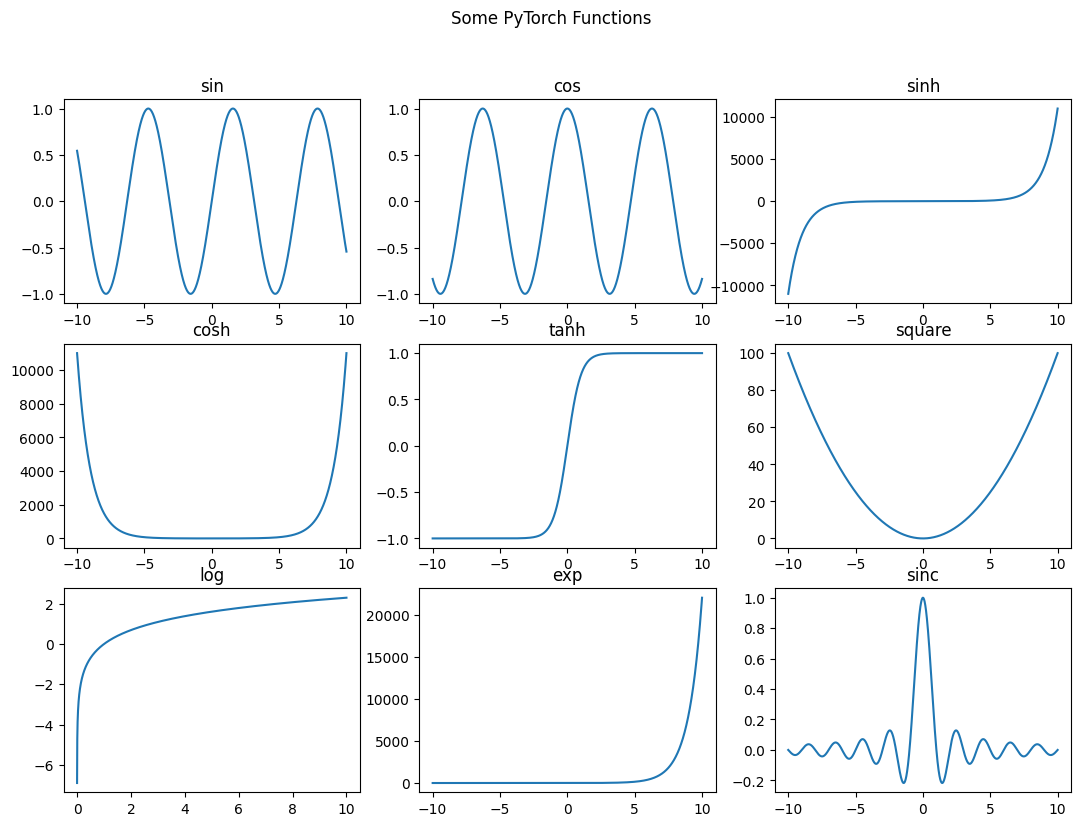

In [50]:
x = torch.linspace(-10, 10, steps=10000)
plt.figure(figsize=(13, 9))
def map_funcs(obj, func_list):
    return [func(obj) for func in func_list]
func_list = [torch.sin, torch.cos, torch.sinh, torch.cosh, torch.tanh, torch.square, torch.log, torch.exp, torch.sinc]
func_names = ["sin", "cos", "sinh", "cosh", "tanh", "square", "log", "exp", "sinc"]
ys = map_funcs(x, func_list)

for i in range(len(ys)):
  plt.subplot(int(math.sqrt(len(ys))), int(math.sqrt(len(ys))), i+1)
  plt.plot(x, ys[i])
  plt.title(func_names[i])
plt.suptitle("Some PyTorch Functions")
plt.show()

# Defining NNs and training NNs

## Defining CNN using nn.Sequential

In [51]:
# A simple CNN using sequential
model1 = nn.Sequential(nn.Conv2d(1, 32, 3),
                      nn.ReLU(),
                      nn.Conv2d(32, 64, 3)
                      )

# A simple CNN using sequential and ordered dict
model2 = nn.Sequential(OrderedDict([
                      ("Conv1", nn.Conv2d(1, 32, 3)),
                      ("ReLU1", nn.ReLU()),
                      ("Conv2", nn.Conv2d(32, 64, 3))
                      ]))

print(model1, "\n", model2)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
) 
 Sequential(
  (Conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (ReLU1): ReLU()
  (Conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)


## Training a Dense and a Convolutional network for classification of Fashion MNIST dataset

### 1: Training a Fully Connected Neural Network

#### Defining hyperparameters and loading the dataset

In [52]:
# Defining hyperparameters
input_size = 784
num_classes = 10
lr = 0.001
batch_size = 64
num_epochs = 5

# Load data
train_dataset = datasets.FashionMNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)
test_dataset = datasets.FashionMNIST(
    root="dataset/", train=False, transform=transforms.ToTensor(), download=True
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

#### Defining Neural Network

In [53]:
# A simple dense network using sequential
densenn = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 32),
                      nn.ReLU(),
                      nn.Linear(32, 10)
                      ).to(device)

#### Defining Train and Test functions

In [54]:
# Train Network
def train(model, num_epochs, device, loader, criterion, optimizer, reshaping=False):
  for epoch in range(num_epochs):
      for batch_idx, (data, targets) in enumerate(tqdm(loader)):
          # Move data to appropriate device
          data = data.to(device=device)
          targets = targets.to(device=device)

          # reshape if you're dealing with fully connected model
          if reshaping:
            data = data.reshape(data.shape[0], -1)

          # Forward pass
          scores = model(data)
          loss = criterion(scores, targets)

          # Backward pass
          optimizer.zero_grad()
          loss.backward()

          # Gradient descent and enhancing weights
          optimizer.step()

# Check accuracy on training & test to see how good our model
def test(model, loader, reshaping=False):
    """A simple function to check the accuracy of the model on the test set"""
    num_correct = 0
    num_samples = 0
    model.eval()
    # We don't need to keep track of gradients here, so we wrap the function body in torch.no_grad()
    with torch.no_grad():
        # Loop through the loader
        for x, y in loader:

            # Move data to appropriate device
            x = x.to(device=device)
            y = y.to(device=device)

            # reshape if you're dealing with fully connected model
            if reshaping:
              x = x.reshape(x.shape[0], -1)

            # Forward pass
            scores = model(x)
            _, predictions = scores.max(1)

            # Count number of correct predictions
            num_correct += (predictions == y).sum()

            # Keep track of number of samples
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples

#### Define criterion, optimizer, and do the train and test steps

In [55]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenn.parameters(), lr=lr)

# Train model for number of epochs
train(densenn, num_epochs, device, train_loader, criterion, optimizer, reshaping=True)
# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {test(densenn, train_loader, reshaping=True)*100:.2f}")
print(f"Accuracy on test set: {test(densenn, test_loader, reshaping=True)*100:.2f}")

100%|██████████| 938/938 [00:08<00:00, 114.55it/s]


Accuracy on training set: 89.79
Accuracy on test set: 87.50


### 2: Training a Convolutional Neural Network

#### Defining hyperparameters

In [56]:
# Defining hyperparameters
in_channels = 1
num_classes = 10
num_epochs = 10

#### define a class for Convolutional Neural Networks

In [57]:
# define a class for Convolutional Neural Networks
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fcl = nn.Linear(32 * 7 * 7, num_classes)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)


    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcl(x)
        return x

#### Define criterion, optimizer, instanciate and object from CNN clas, and do the train and test steps

In [58]:
# Initialize network
cnn = CNN(in_channels=in_channels, num_classes=num_classes).to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=lr)

# Train model for number of epochs
train(cnn, num_epochs, device, train_loader, criterion, optimizer)
# Check accuracy on training & test to see how good our model
print(f"Accuracy on training set: {test(cnn, train_loader)*100:.2f}")
print(f"Accuracy on test set: {test(cnn, test_loader)*100:.2f}")

100%|██████████| 938/938 [00:08<00:00, 105.96it/s]


Accuracy on training set: 92.74
Accuracy on test set: 90.47
